<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Project/TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#Access Data from the Files

In [16]:
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()
# print(tweets)

In [17]:
len(tweets)

11916

In [18]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [19]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [20]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

In [21]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

In [22]:
len(labels)

11916

#Convert to DataFrame

In [24]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

In [32]:
print(df.head())
print(df.shape)

                                               TWEET  CATEGORY
1   Bono... who cares. Soon people will understan...         0
2   Eight years the republicans denied obama’s pi...         1
3   Get him some line help. He is gonna be just f...         0
4                         She is great. Hi Fiona! \n         0
5   She has become a parody unto herself? She has...         1
(11916, 2)


#Check for missing values or null tweets

In [34]:
df.TWEET.isnull().values.any()

False

In [35]:
df.CATEGORY.isnull().values.any()

False

In [36]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [50]:
df.CATEGORY.value_counts()

0    7976
1    3940
Name: CATEGORY, dtype: int64

In [51]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

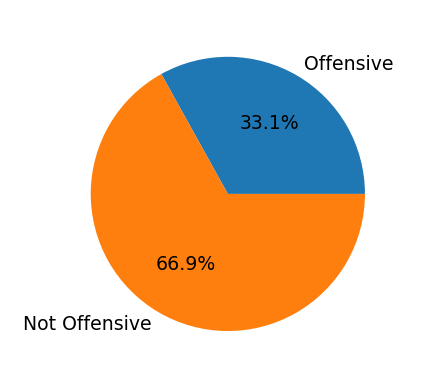

In [57]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing